# **Bottle Inspection** 
**Notebook creado por [Marlon Tecotl](https://www.linkedin.com/in/marlon-tecotl/) para el Master en [Vision Artificial](https://www.techtitute.com/informatica/master/master-vision-artificial) en [Tech](https://www.techtitute.com/) (2024).**

Se ha instalado una camara de visión con un contraluz en una linea de producción de botellas de agua para el control de calidad del cierre del tapon y el llenado de la botella.
Para ello se pide realizar un programa en python usando opencv para detectar si una botella es correcta o incorrecta.

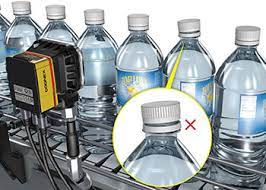

Los sistemas de embotellado son maquinas de alta cadencia capaces de producir a velocidades de hasta 90.000 botellas/hora. Esto nos da una cadencia de 40ms/botella. 
Contando que la camara de visión es capaz de adquirir una imagen cada 10ms, nos quedan solo 30ms para poder procesar-la  y entregar el resultado a la maquina para que rechaze las botellas que sean incorrectas. Por este motivo se plantea el realizar un programa utilizando solo histogramas ya que seran suficientes para realizar todas las inspecciones.

En primer lugar importamos las librerias que vamos a utilizar:

In [1]:
# importamos las libreiras
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 8]
import cv2
import numpy as np
import os

## **Cargar imagenes del dataset**
Se pide cargar todas las imagenes y mostrar-las usando matplotlib. El nombre de la imagen indica si esta es buena(good_) o mala(no_good_). Las inspecciones a realizar son:


*   Correcto cierre del tapon
*   Presencia del tapón
*   Control de llenado
*   Presencia de etiqueta

La siguienta tabla muestra los defectos de las imagenes malas:
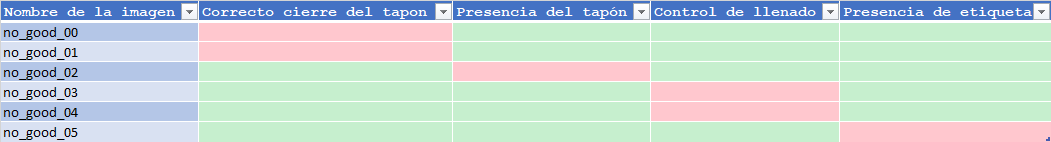



In [2]:
# ruta
images_path = 'data/bottle_inspection'

Para su uso posterior se pide guardar las imagenes en una lista de diccionarios

Mas info en los siguientes links:

[dict](https://www.w3schools.com/python/python_dictionaries.asp)

[list](https://www.w3schools.com/python/python_lists.asp)

Ejemplo:
```
# array para guardar las imagenes de entrada
input_images = []

# cargamos la imagen y la añadimos a la lista
  input_images.append({'image': cv2.cvtColor(cv2.imread(os.path.join(images_path, file)), cv2.COLOR_RGB2BGR),
                       'name': file})
```



['good_00.png', 'good_01.png', 'good_02.png', 'no_good_00.png', 'no_good_01.png', 'no_good_02.png', 'no_good_03.png', 'no_good_04.png', 'no_good_05.png']


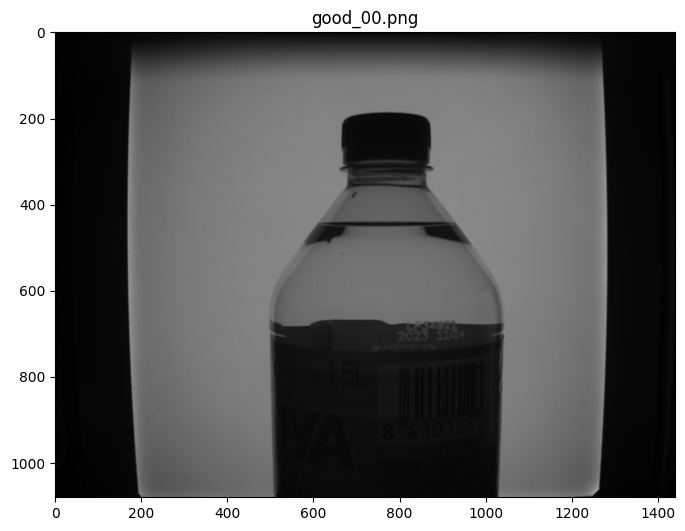

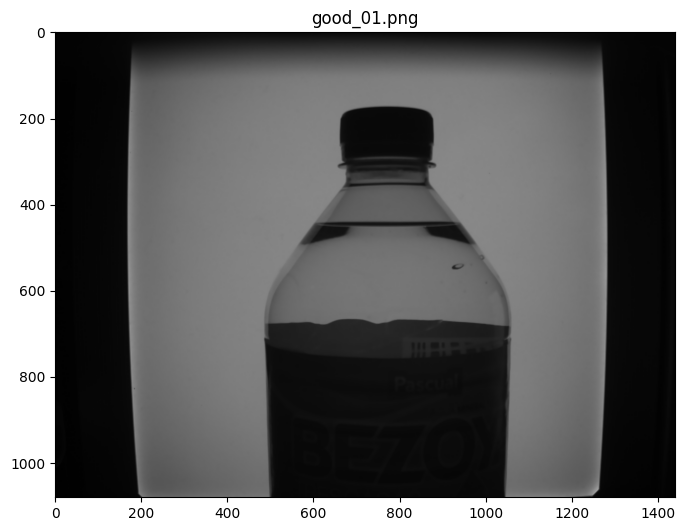

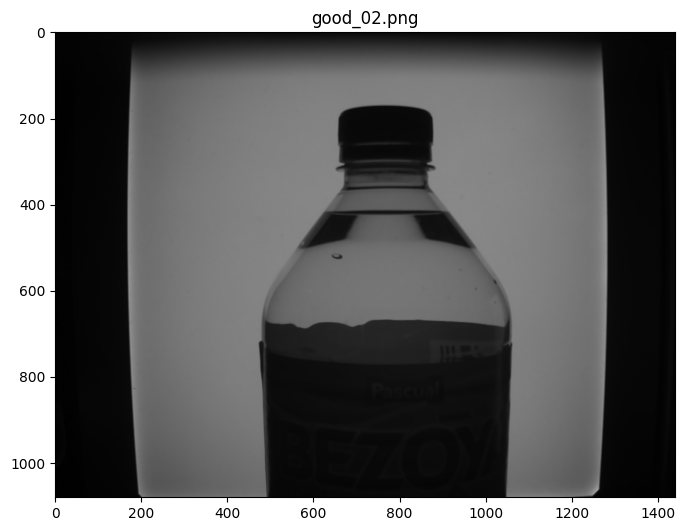

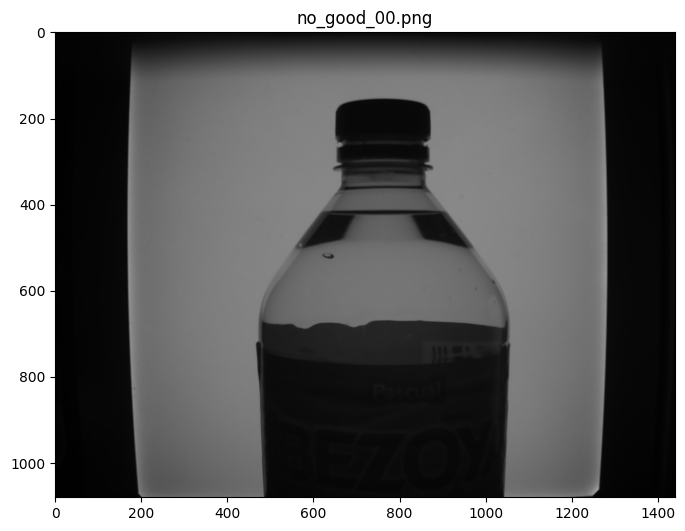

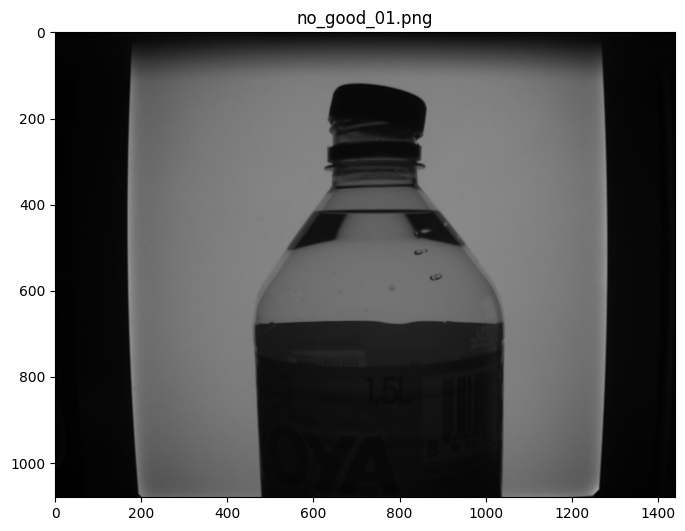

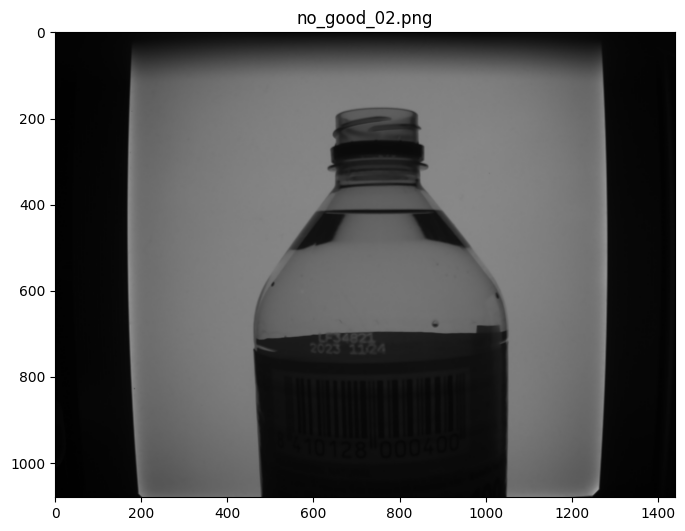

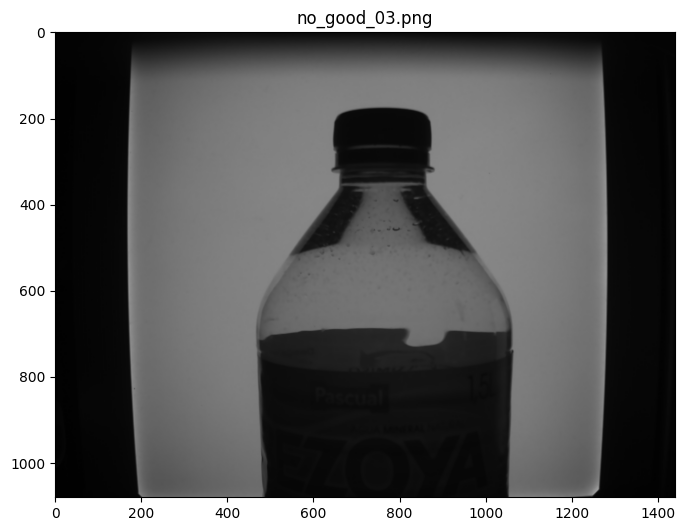

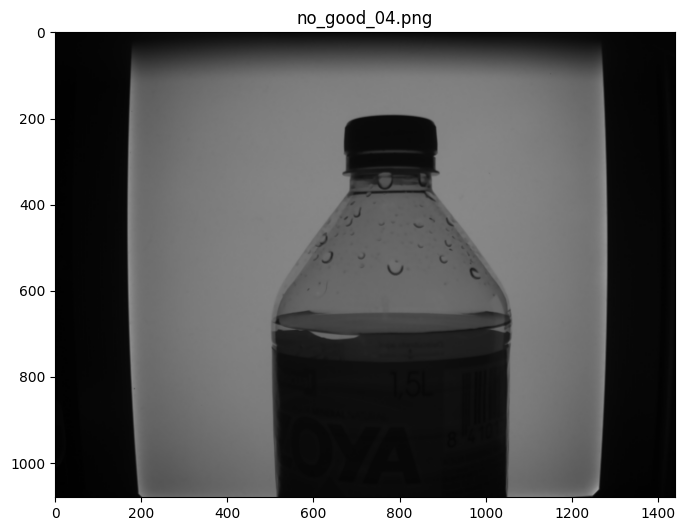

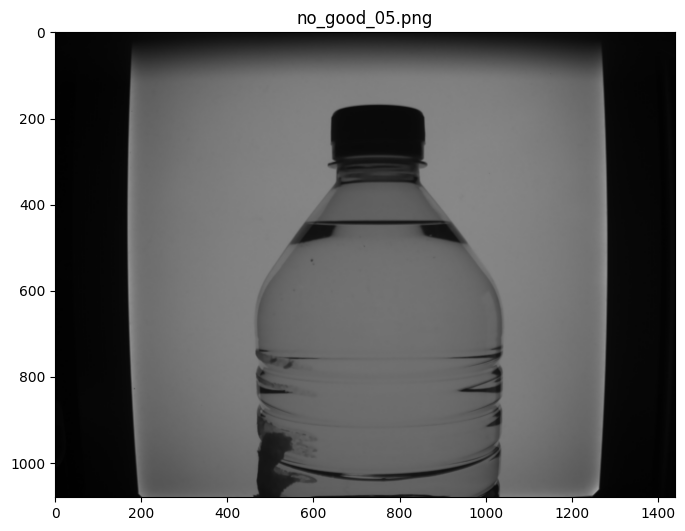

In [3]:
# obtenemos los archivos
files = os.listdir(images_path)
print(files)

# array para guardar las imagenes de entrada
input_images = []

# recorremos los archivos
for file in files:

  # cargamos la imagen y la añadimos a la lista
  input_images.append({'image': cv2.cvtColor(cv2.imread(os.path.join(images_path, file)), cv2.COLOR_BGR2RGB),
                       'name': file})
  
  plt.title(file)
  plt.imshow(input_images[-1]['image'])
  plt.show()  

## **Crear programa de inspección**
En este apartado, se deberan crear el programa para poder inspeccionar las botellas rechazando aquellas que no sean correctas. Se debe pintar en la imagen una roi en verde o rojo y el resultado numerico utilizado para la evaluación de la inspección.
Los resultados esperados seran como los que mostramos a continuacion:

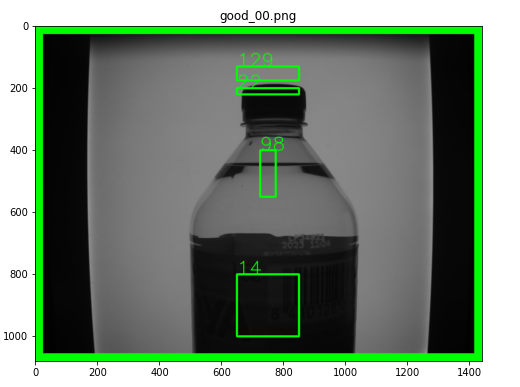

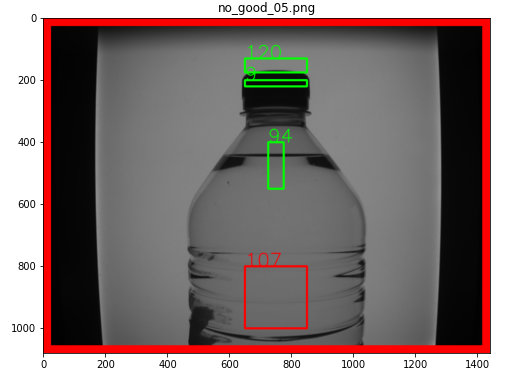

En este tipo de inspecciónes se suele utilizar el brillo y el contraste para la evaluación de la luminosidad o la homogeneidad de una roi. A continuación se define como extraer estos valores:

${mean} = \frac{\sum \limits _{i=0}^{n}\sum \limits _{j=0}^{m}P({i},{j})}{nm}$


${contrast} = \sum \limits _{i=0}^{n}\sum \limits _{j=0}^{m} Max(P({i},{j})) - Min(P({i},{j}))$

A continuación se da el codigo de los tres metodos que debemos utilizar

In [4]:
def plot_hist(gray_image, tresh):
  """
  Metodo para mostar el histograma de la imagen de entrada

  params:
    gray_image: imagen de entrada escala de gris
    thresh: treshold histograma
  """""
  # calculamos el histograma
  hist = cv2.calcHist([gray_image],[0],None,[256],[0,256])
  plt.plot(np.array([tresh, tresh]),np.array([0,np.max(hist)]), color='red', linestyle='--')
  plt.plot(hist)
  plt.show()

def get_contrast(gray_image, plot_hist):
  """
  Metodo para obtener la diferencia entre el minimo y el maximo
  params:
    gray_image: imagen de entrada escala de gris
    plot_hist: if true mostraremos el histograma
  """""

  # calculamos la diferencia entre el pixel mas claro y el mas oscuro  
  contrast = round(np.max(gray_image) - np.min(gray_image))

  # pintamos el histograma si lo indica el usuario
  if plot_hist:
    plot_hist(gray_image, contrast)
  
  return contrast

def get_brightness (gray_image, plot_hist):
  """
  Metodo para obtener el brillo de una imagen
  params:
    gray_image: imagen de entrada escala de gris
    plot_hist: if true mostraremos el histograma
  """""

  # calculamos el brillo
  brightness  =  round(np.sum(gray_image) / gray_image.size)

  # pintamos el histograma si lo indica el usuario
  if plot_hist:
    plot_hist(gray_image, brightness)

  return brightness

Para poder pintar regiones en la imagen usaremos [cv2.rectangle()](https://www.geeksforgeeks.org/python-opencv-cv2-rectangle-method/) y [cv2.puttext](https://www.geeksforgeeks.org/python-opencv-cv2-puttext-method/)

Crear un metodo donde crearemos todo el programa.
```
def bootle_inspection(input_image, image_name):
  """
  Metodo para realizar la inspección de una botella
  params:
    input_image: imagen de entrada
    image_name: nombre a usar para mostrar en el plot
  """""
```



In [7]:
def bootle_inspection(input_image, image_name):
    """
    Metodo para realizar la inspección de una botella
    params:
    input_image: imagen de entrada
    image_name: nombre a usar para mostrar en el plot
    """
    # indicamos el numero de inspecciones
    numero_inspecciones = 4

    # inicamos un array a None donde iremos guardando los resultados de cada inspeccion
    resultados = [None for a in range(numero_inspecciones)]
    
    # convertimos la imagen a escala de grises para procesarla
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

    # copiamos la imagen para pintar los graficos
    out_image = input_image.copy()


    #######################################################################
    ################# Detección del cierre tapon ########################## 
    #######################################################################

    # indice de inspeccion
    index = 0

    # definimos la roi (x0,y0), (x1, y1)
    roi = [(650,130), (850,175)]

    # recortamos la imagen
    cropped_image = gray_image[roi[0][1]:roi[1][1],roi[0][0]:roi[1][0]]
    
    # calculamos el threshold
    thresh = get_brightness(cropped_image, False)
    
    # evaluamos el resultado
    resultados[index] = True if thresh > 100 else False
    
    # pintamos el recuadro y el threshold
    cv2.rectangle(out_image, roi[0], roi[1], (int(not resultados[index]) * 255, int(resultados[index]) * 255, 0), 5)
    cv2.putText(out_image, str(thresh), roi[0], cv2.FONT_HERSHEY_SIMPLEX, 2, (int(not resultados[index]) * 255, int(resultados[index]) * 255,0), 2, cv2.LINE_AA)


    #######################################################################
    ################# Detección presencia tapon ###########################
    #######################################################################

    # indice de inspeccion
    index = 1

    # definimos la roi (x0,y0), (x1, y1)
    roi = [(650,200), (850,220)]

    # recortamos la imagen
    cropped_image = gray_image[roi[0][1]:roi[1][1],roi[0][0]:roi[1][0]]
    
    # calculamos el threshold
    thresh = get_brightness(cropped_image, False)
    
    # evaluamos el resultado
    resultados[index] = True if thresh < 50 else False
    
    # pintamos el recuadro y el threshold
    cv2.rectangle(out_image, roi[0], roi[1], (int(not resultados[index]) * 255, int(resultados[index]) * 255,0), 5)
    cv2.putText(out_image, str(thresh), roi[0], cv2.FONT_HERSHEY_SIMPLEX, 2, (int(not resultados[index]) * 255, int(resultados[index]) * 255,0), 2, cv2.LINE_AA)


    #######################################################################
    ################# Detección correcto llenado ########################## 
    #######################################################################

    # indice de inspeccion
    index = 2

    # definimos la roi (x0,y0), (x1, y1)
    roi = [(725,400), (775,550)]

    # recortamos la imagen
    cropped_image = gray_image[roi[0][1]:roi[1][1],roi[0][0]:roi[1][0]]
    
    # calculamos el threshold
    thresh = get_contrast(cropped_image, False)
    
    # evaluamos el resultado
    resultados[index] = True if thresh > 80 else False
    
    # pintamos el recuadro y el threshold
    cv2.rectangle(out_image, roi[0], roi[1], (int(not resultados[index]) * 255, int(resultados[index]) * 255,0), 5)
    cv2.putText(out_image, str(thresh), roi[0], cv2.FONT_HERSHEY_SIMPLEX, 2, (int(not resultados[index]) * 255, int(resultados[index]) * 255,0), 2, cv2.LINE_AA)


    #######################################################################
    ################# Detección etiqueta ##################################
    #######################################################################

    # indice de inspeccion
    index = 3

    # definimos la roi (x0,y0), (x1, y1)
    roi = [(650,800), (850,1000)]

    # recortamos la imagen
    cropped_image = gray_image[roi[0][1]:roi[1][1],roi[0][0]:roi[1][0]]
    
    # calculamos el threshold
    thresh = get_brightness(cropped_image, False)
    
    # evaluamos el resultado
    resultados[index] = True if thresh < 50 else False
    
    # pintamos el recuadro y el threshold
    cv2.rectangle(out_image, roi[0], roi[1], (int(not resultados[index]) * 255, int(resultados[index]) * 255,0), 5)
    cv2.putText(out_image, str(thresh), roi[0], cv2.FONT_HERSHEY_SIMPLEX, 2, (int(not resultados[index]) * 255, int(resultados[index]) * 255,0), 2, cv2.LINE_AA)

    if all(resultados):
        # pinaremos el resultado ok
        cv2.rectangle(out_image, (0,0), out_image.shape[1::-1], (0,255,0), 50)
    else:
        # pintaremos resultado nok
        cv2.rectangle(out_image, (0,0), out_image.shape[1::-1], (255,0,0), 50)

    plt.title(image_name)
    plt.imshow(out_image)
    plt.show()

## **Ejecución del programa de inspección**
En este apartado, se deberan crear un bucle que cargue las imagenes y ejecute el programa mostrando las imagenes resultantes 

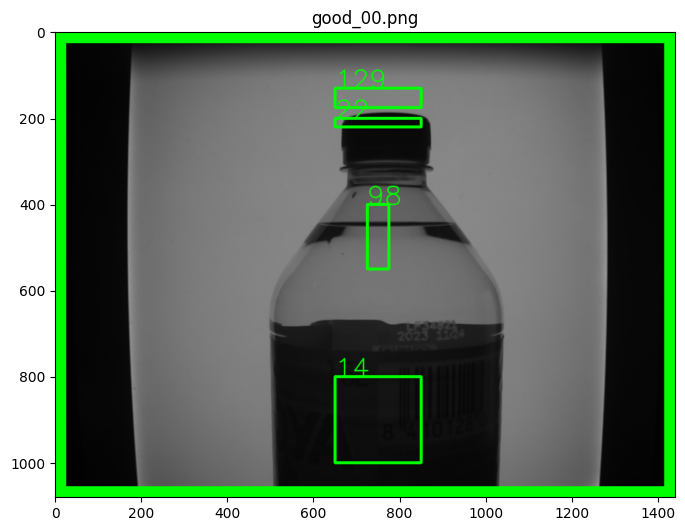

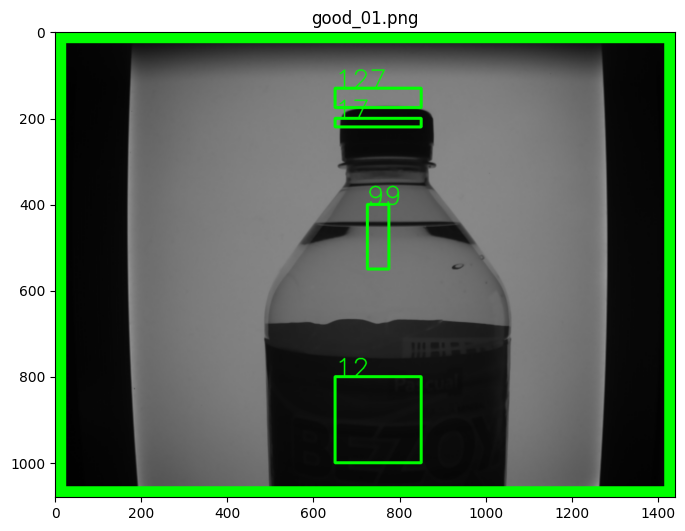

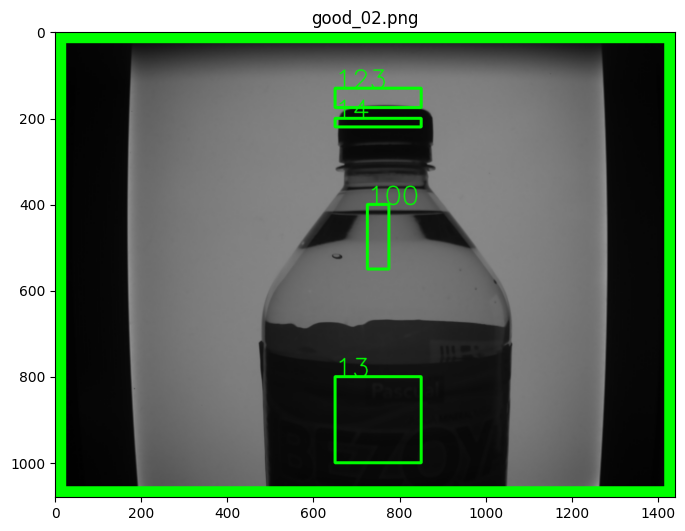

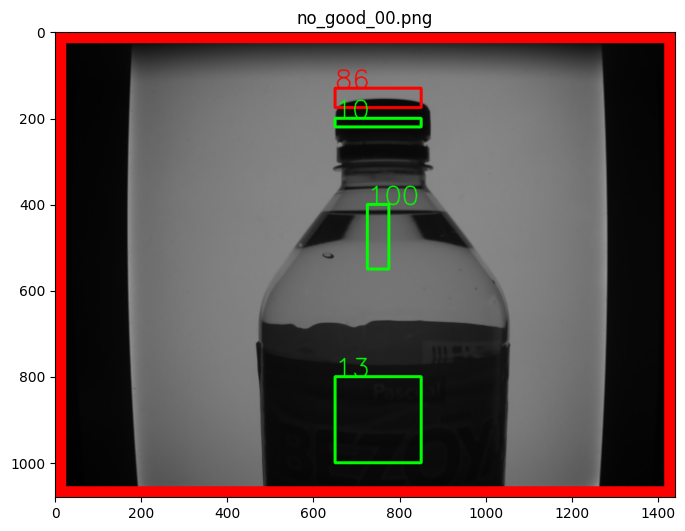

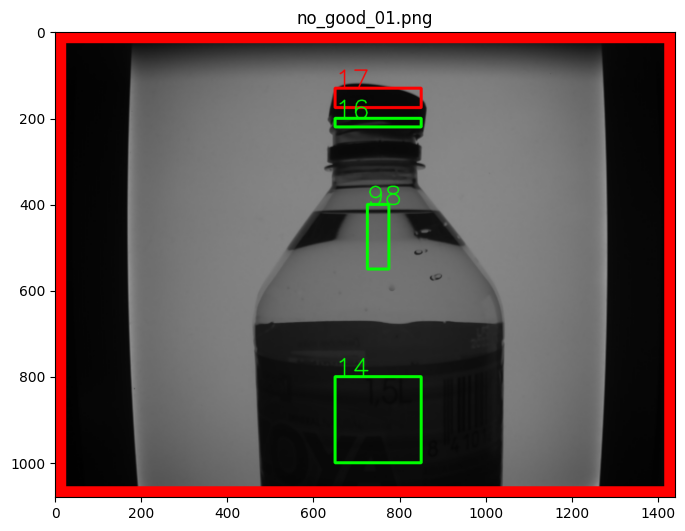

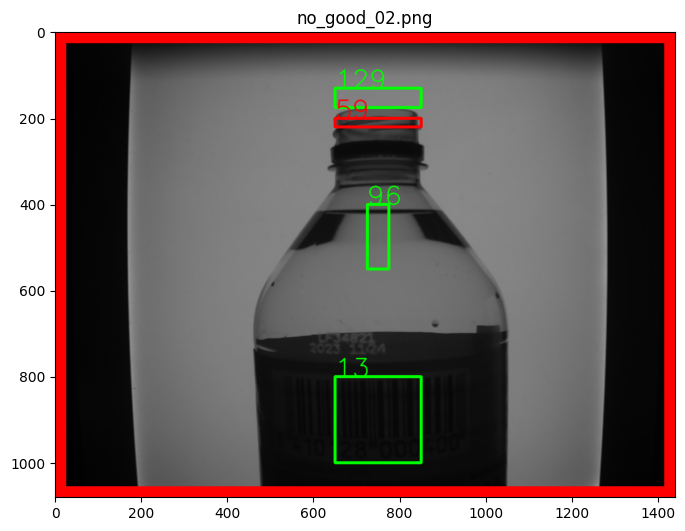

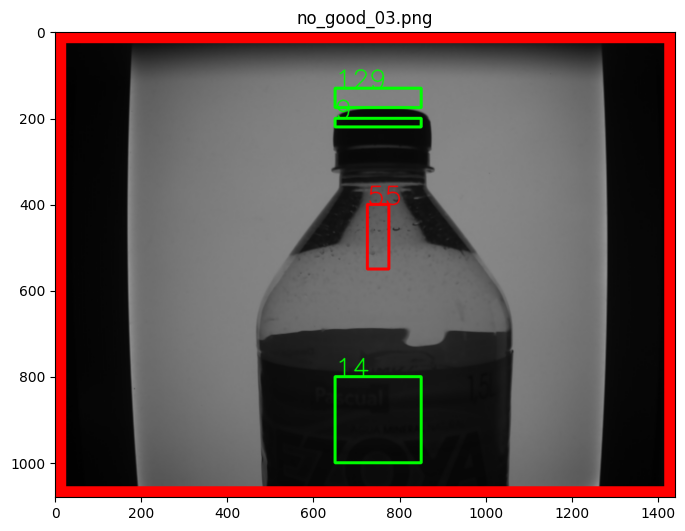

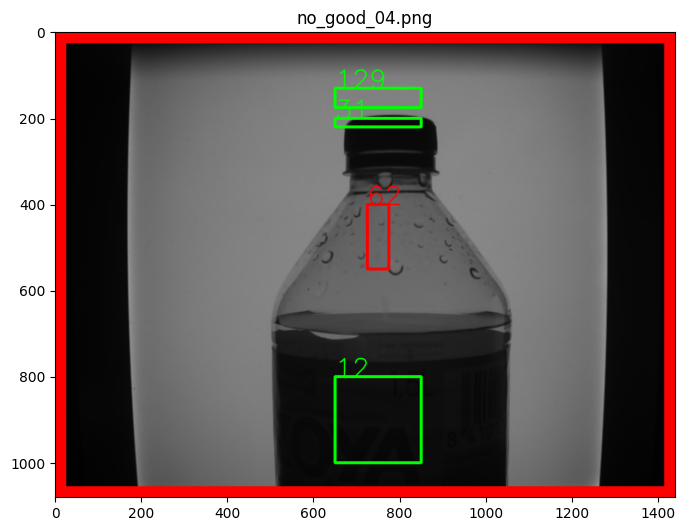

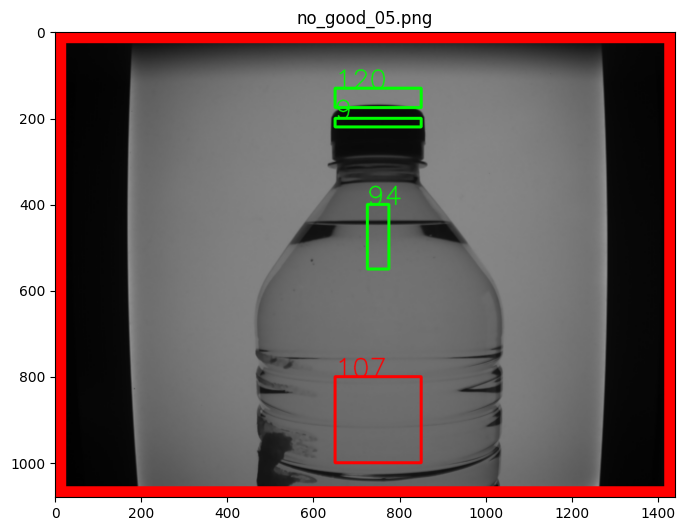

In [6]:
start_image = 0

# recorremos los archivos
for i in range(start_image,len(input_images)):
  bootle_inspection(input_images[i]['image'], input_images[i]['name'])
  # break